In [48]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Primeiro precisamos baixar todos os arquivos de execução por mês do site da Prefeitura. Para isso o seguinte comando do shell é suficiente:

In [ ]:
!for i in 0{1..9} 10 ; do wget http://orcamento.prefeitura.sp.gov.br/orcamento/uploads/2015/qdd_${i}2015.xls ; done

Feito isso carremos cada um dos arquivos utilizando o Pandas:

In [42]:
dados = []
for mes in range(10):
    dados.append(pd.read_excel('qdd_{:02d}2015.xls'.format(mes + 1)))

E finalmente agrupamos os dados a partir do código de um orgão e somamos o total da coluna Vl_Liquidado:

In [101]:
dg = []
for i in range(10):
    dg.append(dados[i].groupby(['Cd_Orgao'])['Vl_Liquidado'].sum())

Mas estamos interessados apenas nas secretarias, então pra isso vou filtrar todos os códigos de orgãos cujo nome comece com SECRETARIA:

In [194]:
sd = dados[0][dados[0]['Ds_Orgao'].str.startswith('SECRETARIA')][['Cd_Orgao', 'Ds_Orgao']]
secretarias = sd.drop_duplicates()
secretarias_list = secretarias.values.tolist()

E finalmente vamos produzir uma série temporal pra cada secretaria. Pra isso iremos calcular o valor do mês corrente, menos o valor já liquidado do começo do ano até o mês anterior:

In [110]:
sec_time_series = {}
for sec in dg[0].index:
    sec_time_series[sec] = [dg[mes][sec] - dg[mes-1][sec] for mes in range(1,10)]


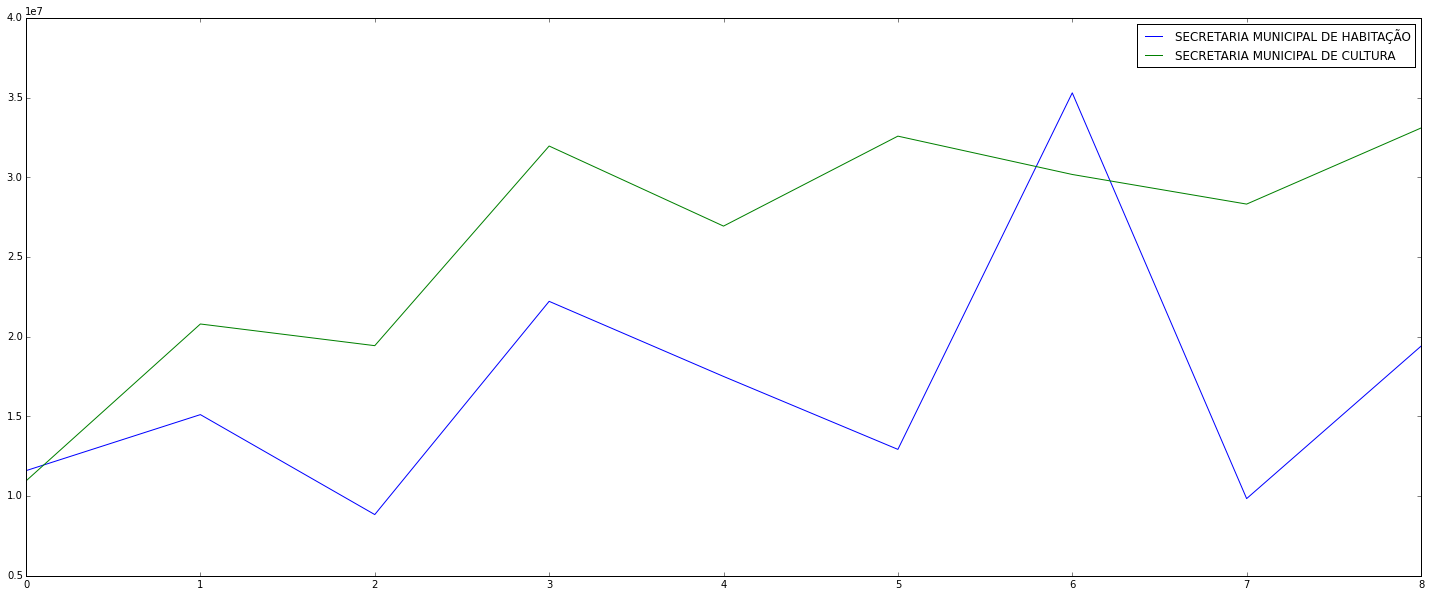

In [220]:
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set']
plot(sec_time_series[14], label=sec_code(14))
plot(sec_time_series[25], label=sec_code(25))
legend()
pylab.rcParams['figure.figsize'] = (15.0, 8.0)

In [207]:
def sec_code(code):
    return secretarias[secretarias['Cd_Orgao'] == code]['Ds_Orgao'].values[0]